In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
df = pd.read_csv("movies_data.csv")
df.head()

,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,...,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,reviews,credits
0,False,/h8gHn0OzBoaefsYseUByqsmEDMY.jpg,"{'id': 404609, 'name': 'John Wick Collection',...",90000000,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",https://johnwick.movie,603692,tt10366206,en,John Wick: Chapter 4,...,170,"[{'english_name': 'Arabic', 'iso_639_1': 'ar',...",Released,"No way back, one way out.",John Wick: Chapter 4,False,7.950,2763,"{'page': 1, 'results': [{'author': 'thealanfre...","{'cast': [{'adult': False, 'gender': 2, 'id': ..."
1,False,/2klQ1z1fcHGgQPevbEQdkCnzyuS.jpg,NaN,100000000,"[{'id': 16, 'name': 'Animation'}, {'id': 10751...",https://www.thesupermariobros.movie,502356,tt6718170,en,The Super Mario Bros. Movie,...,92,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,The Super Mario Bros. Movie,False,7.800,4459,"{'page': 1, 'results': [{'author': 'Chris Sawi...","{'cast': [{'adult': False, 'gender': 2, 'id': ..."
2,False,/2I5eBh98Q4aPq8WdQrHdTC8ARhY.jpg,"{'id': 573436, 'name': 'Spider-Man: Spider-Ver...",100000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",https://www.acrossthespiderverse.movie,569094,tt9362722,en,Spider-Man: Across the Spider-Verse,...,140,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,It's how you wear the mask that matters,Spider-Man: Across the Spider-Verse,False,8.802,935,"{'page': 1, 'results': [{'author': 'garethmb',...","{'cast': [{'adult': False, 'gender': 2, 'id': ..."
3,False,/4t0oBFrJyweYPt0hocW6RUa0b6H.jpg,"{'id': 9485, 'name': 'The Fast and the Furious...",340000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",https://fastxmovie.com,385687,tt5433140,en,Fast X,...,142,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The end of the road begins.,Fast X,False,7.199,885,"{'page': 1, 'results': [{'author': 'MSB', 'aut...","{'cast': [{'adult': False, 'gender': 2, 'id': ..."
4,False,/9t0tJXcOdWwwxmGTk112HGDaT0Q.jpg,NaN,0,"[{'id': 27, 'name': 'Horror'}, {'id': 53, 'nam...",https://theavenue.film/movies/the-black-demon,890771,tt10279472,en,The Black Demon,...,100,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Nature bites back.,The Black Demon,False,6.351,111,"{'page': 1, 'results': [], 'total_pages': 0, '...","{'cast': [{'adult': False, 'gender': 2, 'id': ..."


In [21]:
print(df.columns)
print(df["status"].value_counts())
df.info()

Index(['adult', 'backdrop_path', 'belongs_to_collection', 'budget', 'genres',
       'homepage', 'id', 'imdb_id', 'original_language', 'original_title',
       'overview', 'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count', 'reviews', 'credits'],
      dtype='object')
status
Released           9924
Post Production      38
In Production        22
Planned              16
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  10000 non-null  bool   
 1   backdrop_path          9694 non-null   object 
 2   belongs_to_collection  2794 non-null   object 
 3   budget                 10000 non-null  int64  
 4   genr

Interesują nas filmy tylko ze statusem Released. Usuniemy zatem pozostałe. Oprócz tego możemy pozbyć się kolumn, których nie będziemy potrzebować.

In [22]:
print(df.shape)
# Filtrowanie wierszy, gdzie wartość w kolumnie 'status' wynosi "Released"
df = df.loc[df["status"] == "Released"]

columns_to_remove = [
    "adult",
    "backdrop_path",
    "belongs_to_collection",
    "homepage",
    "imdb_id",
    "poster_path",
    "video",
    "status",
    "original_title",
    "id",
]
df = df.drop(columns_to_remove, axis=1)
print(df.shape)
print(df.columns)
# wyświetlenie dataframe
df.head(1)

(10000, 27)
(9924, 17)
Index(['budget', 'genres', 'original_language', 'overview', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'tagline', 'title',
       'vote_average', 'vote_count', 'reviews', 'credits'],
      dtype='object')


,budget,genres,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,tagline,title,vote_average,vote_count,reviews,credits
0,90000000,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",en,"With the price on his head ever increasing, Jo...",4071.868,"[{'id': 3528, 'logo_path': '/cCzCClIzIh81Fa79h...","[{'iso_3166_1': 'DE', 'name': 'Germany'}, {'is...",2023-03-22,431769198,170,"[{'english_name': 'Arabic', 'iso_639_1': 'ar',...","No way back, one way out.",John Wick: Chapter 4,7.95,2763,"{'page': 1, 'results': [{'author': 'thealanfre...","{'cast': [{'adult': False, 'gender': 2, 'id': ..."


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9924 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                9924 non-null   int64  
 1   genres                9924 non-null   object 
 2   original_language     9924 non-null   object 
 3   overview              9856 non-null   object 
 4   popularity            9924 non-null   float64
 5   production_companies  9924 non-null   object 
 6   production_countries  9924 non-null   object 
 7   release_date          9921 non-null   object 
 8   revenue               9924 non-null   int64  
 9   runtime               9924 non-null   int64  
 10  spoken_languages      9924 non-null   object 
 11  tagline               7337 non-null   object 
 12  title                 9924 non-null   object 
 13  vote_average          9924 non-null   float64
 14  vote_count            9924 non-null   int64  
 15  reviews               9924

Musimy zwrócić uwagę, że kolumny "genres" posiadają listę słowników, które przechowują id oraz nazwę danego gatunku, nam się przyda tylko nazwa, więc to poprawimy. Podobnie jest z 'production_companies', 'production_countries', 'spoken_languages' i jeszcze kilkoma. Zajmijmy się najpierw tymi trzema. Przy okazji zamienimy typ danych na odpowiedni dla nich.

In [24]:
import ast

# Przekształcenie kolumny 'genres' na listę nazw gatunków filmowych
df["genres"] = (
    df["genres"].apply(ast.literal_eval).apply(lambda x: [genre["name"] for genre in x])
)
# print(df.genres[0])

df["production_companies"] = (
    df["production_companies"]
    .apply(ast.literal_eval)
    .apply(lambda x: [company["name"] for company in x])
)
print(df.production_companies[0])

df["production_countries"] = (
    df["production_countries"]
    .apply(ast.literal_eval)
    .apply(lambda x: [company["iso_3166_1"] for company in x])
)
print(df.production_countries[0])

df["spoken_languages"] = (
    df["spoken_languages"]
    .apply(ast.literal_eval)
    .apply(lambda x: [lang["iso_639_1"] for lang in x])
)
print(df.spoken_languages[0])

df["popularity"] = pd.to_numeric(df["popularity"], errors="coerce", downcast="float")
df["budget"] = pd.to_numeric(df["budget"], errors="coerce", downcast="float")
df["revenue"] = pd.to_numeric(df["revenue"], errors="coerce", downcast="float")
df["release_date"] = pd.to_datetime(df["release_date"])

df.head()

['Thunder Road', '87Eleven', 'Summit Entertainment', 'Studio Babelsberg']
['DE', 'US']
['ar', 'cn', 'en', 'fr', 'de', 'ja', 'la', 'ru', 'es']


,budget,genres,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,tagline,title,vote_average,vote_count,reviews,credits
0,90000000.0,"[Action, Thriller, Crime]",en,"With the price on his head ever increasing, Jo...",4071.867920,"[Thunder Road, 87Eleven, Summit Entertainment,...","[DE, US]",2023-03-22,4.317692e+08,170,"[ar, cn, en, fr, de, ja, la, ru, es]","No way back, one way out.",John Wick: Chapter 4,7.950,2763,"{'page': 1, 'results': [{'author': 'thealanfre...","{'cast': [{'adult': False, 'gender': 2, 'id': ..."
1,100000000.0,"[Animation, Family, Adventure, Fantasy, Comedy]",en,"While working underground to fix a water main,...",3054.105957,"[Universal Pictures, Illumination, Nintendo]","[JP, US]",2023-04-05,1.308767e+09,92,[en],NaN,The Super Mario Bros. Movie,7.800,4459,"{'page': 1, 'results': [{'author': 'Chris Sawi...","{'cast': [{'adult': False, 'gender': 2, 'id': ..."
2,100000000.0,"[Action, Adventure, Animation, Science Fiction]",en,"After reuniting with Gwen Stacy, Brooklyn’s fu...",2860.754883,"[Columbia Pictures, Sony Pictures Animation, M...",[US],2023-05-31,2.215794e+08,140,"[en, hi, it, es]",It's how you wear the mask that matters,Spider-Man: Across the Spider-Verse,8.802,935,"{'page': 1, 'results': [{'author': 'garethmb',...","{'cast': [{'adult': False, 'gender': 2, 'id': ..."
3,340000000.0,"[Action, Crime, Thriller]",en,Over many missions and against impossible odds...,2177.081055,"[Universal Pictures, Original Film, One Race, ...",[US],2023-05-17,6.030000e+08,142,"[en, it, pt, es]",The end of the road begins.,Fast X,7.199,885,"{'page': 1, 'results': [{'author': 'MSB', 'aut...","{'cast': [{'adult': False, 'gender': 2, 'id': ..."
4,0.0,"[Horror, Thriller]",en,Oilman Paul Sturges' idyllic family vacation t...,1746.267944,"[Mucho Mas Media, Silk Mass, The Avenue Entert...",[DO],2023-04-26,0.000000e+00,100,"[en, es]",Nature bites back.,The Black Demon,6.351,111,"{'page': 1, 'results': [], 'total_pages': 0, '...","{'cast': [{'adult': False, 'gender': 2, 'id': ..."


Pozbyliśmy się już sporej liczby niepotrzebnych danych, ale nadal można wiele kolumn odchudzić. Zajmijmy się zatem najdłuższymi kolumnami - 'reviews', a później 'cast'.

In [25]:
df["reviews"].head()

0    {'page': 1, 'results': [{'author': 'thealanfre...
1    {'page': 1, 'results': [{'author': 'Chris Sawi...
2    {'page': 1, 'results': [{'author': 'garethmb',...
3    {'page': 1, 'results': [{'author': 'MSB', 'aut...
4    {'page': 1, 'results': [], 'total_pages': 0, '...
Name: reviews, dtype: object

In [26]:
df["reviews"] = (
    df["reviews"]
    .apply(ast.literal_eval)
    .apply(lambda x: [review["content"] for review in x["results"]])
)

print(df.reviews[0])

['Check out the full spoiler free review at Sunshine State Cineplex. \r\nhttps://sunshinestatecineplex.com/2023/03/13/sxsw-2023-john-wick-chapter-4-2023/\r\n\r\nJohn Wick: Chapter 4 might be a little long, but when it is fun, there are few films that can compete with its magnetism. Reeves shows why he’s one of the best genre actors in the world and pours his heart and soul into a soft-spoken performance. Combined with Stahelski’s fight sequences, this is sure to become a highly rewatched, often quoted classic.', 'Good movie!', '**John Wick: Chapter 4 is at the peak of action cinema and fight choreography. What the film lacks in story is dramatically overcome with the most stunning action set pieces ever seen.**\r\n\r\nJohn Wick: Chapter 4 is an overwhelming feast of action brilliance! For the entire 2.5-hour runtime, this movie transitions from weapon to weapon, set piece to set piece, and spectacle to spectacle topping anything ever seen. The fight sequences never stop, and their beau

Skoro już mamy listę opinii dla każdego filmu, to możemy teraz zająć się kolumną "credits". Do dalszej analizy będziemy potrzebować przynajmniej 5 aktorów wraz ze wskaźnikiem popularności oraz reżysera (również z popularnością). Zróbmy to zatem.

In [27]:
# Przekształcenie kolumny 'credits' na słownik
df["credits"] = df["credits"].apply(ast.literal_eval)


# Funkcja pomocnicza do pobrania listy 5 pierwszych aktorów posortowanych po 'order' wraz z polem 'popularity'
def get_top_actors(actors):
    sorted_actors = sorted(actors, key=lambda x: x["order"])
    top_actors = sorted_actors[:10]
    return [
        {"name": actor["name"], "popularity": actor["popularity"]}
        for actor in top_actors
    ]


# Tworzenie kolumny 'cast' z danymi dotyczącymi aktorów wraz z polem 'popularity'
df["cast"] = df["credits"].apply(lambda x: get_top_actors(x["cast"]))

# Pobieranie danych dotyczących reżysera wraz z polem 'popularity'
df["director"] = df["credits"].apply(
    lambda x: next(
        (
            {"name": crew["name"], "popularity": crew["popularity"]}
            for crew in x["crew"]
            if crew["job"] == "Director"
        ),
        None,
    )
)

df = df.drop("credits", axis=1)
df.head()

,budget,genres,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,tagline,title,vote_average,vote_count,reviews,cast,director
0,90000000.0,"[Action, Thriller, Crime]",en,"With the price on his head ever increasing, Jo...",4071.867920,"[Thunder Road, 87Eleven, Summit Entertainment,...","[DE, US]",2023-03-22,4.317692e+08,170,"[ar, cn, en, fr, de, ja, la, ru, es]","No way back, one way out.",John Wick: Chapter 4,7.950,2763,[Check out the full spoiler free review at Sun...,"[{'name': 'Keanu Reeves', 'popularity': 72.324...","{'name': 'Chad Stahelski', 'popularity': 26.127}"
1,100000000.0,"[Animation, Family, Adventure, Fantasy, Comedy]",en,"While working underground to fix a water main,...",3054.105957,"[Universal Pictures, Illumination, Nintendo]","[JP, US]",2023-04-05,1.308767e+09,92,[en],NaN,The Super Mario Bros. Movie,7.800,4459,[_The Super Mario Bros. Movie_ is like Fruit S...,"[{'name': 'Chris Pratt', 'popularity': 56.98},...","{'name': 'Michael Jelenic', 'popularity': 5.708}"
2,100000000.0,"[Action, Adventure, Animation, Science Fiction]",en,"After reuniting with Gwen Stacy, Brooklyn’s fu...",2860.754883,"[Columbia Pictures, Sony Pictures Animation, M...",[US],2023-05-31,2.215794e+08,140,"[en, hi, it, es]",It's how you wear the mask that matters,Spider-Man: Across the Spider-Verse,8.802,935,[Life as a teenager is never easy and when you...,"[{'name': 'Shameik Moore', 'popularity': 67.02...","{'name': 'Joaquim Dos Santos', 'popularity': 1..."
3,340000000.0,"[Action, Crime, Thriller]",en,Over many missions and against impossible odds...,2177.081055,"[Universal Pictures, Original Film, One Race, ...",[US],2023-05-17,6.030000e+08,142,"[en, it, pt, es]",The end of the road begins.,Fast X,7.199,885,[MORE SPOILER-FREE MINI-REVIEWS @ https://www....,"[{'name': 'Vin Diesel', 'popularity': 50.536},...","{'name': 'Louis Leterrier', 'popularity': 11.378}"
4,0.0,"[Horror, Thriller]",en,Oilman Paul Sturges' idyllic family vacation t...,1746.267944,"[Mucho Mas Media, Silk Mass, The Avenue Entert...",[DO],2023-04-26,0.000000e+00,100,"[en, es]",Nature bites back.,The Black Demon,6.351,111,[],"[{'name': 'Josh Lucas', 'popularity': 16.989},...","{'name': 'Adrian Grünberg', 'popularity': 3.374}"


Nasze dane już całkiem dobrze wyglądają i są gotowe do dalszej analizy, ale możemy dodać jeszcze jedną kolumnę - "profit", a także zmienić kolejność kolumn.

In [28]:
df["profit"] = df["revenue"] - df["budget"]

new_order = [
    "title",
    "genres",
    "overview",
    "tagline",
    "release_date",
    "budget",
    "revenue",
    "profit",
    "popularity",
    "runtime",
    "vote_average",
    "vote_count",
    "cast",
    "director",
    "reviews",
    "original_language",
    "spoken_languages",
    "production_companies",
    "production_countries",
]

df = df[new_order]
df.head()

,title,genres,overview,tagline,release_date,budget,revenue,profit,popularity,runtime,vote_average,vote_count,cast,director,reviews,original_language,spoken_languages,production_companies,production_countries
0,John Wick: Chapter 4,"[Action, Thriller, Crime]","With the price on his head ever increasing, Jo...","No way back, one way out.",2023-03-22,90000000.0,4.317692e+08,3.417692e+08,4071.867920,170,7.950,2763,"[{'name': 'Keanu Reeves', 'popularity': 72.324...","{'name': 'Chad Stahelski', 'popularity': 26.127}",[Check out the full spoiler free review at Sun...,en,"[ar, cn, en, fr, de, ja, la, ru, es]","[Thunder Road, 87Eleven, Summit Entertainment,...","[DE, US]"
1,The Super Mario Bros. Movie,"[Animation, Family, Adventure, Fantasy, Comedy]","While working underground to fix a water main,...",NaN,2023-04-05,100000000.0,1.308767e+09,1.208767e+09,3054.105957,92,7.800,4459,"[{'name': 'Chris Pratt', 'popularity': 56.98},...","{'name': 'Michael Jelenic', 'popularity': 5.708}",[_The Super Mario Bros. Movie_ is like Fruit S...,en,[en],"[Universal Pictures, Illumination, Nintendo]","[JP, US]"
2,Spider-Man: Across the Spider-Verse,"[Action, Adventure, Animation, Science Fiction]","After reuniting with Gwen Stacy, Brooklyn’s fu...",It's how you wear the mask that matters,2023-05-31,100000000.0,2.215794e+08,1.215794e+08,2860.754883,140,8.802,935,"[{'name': 'Shameik Moore', 'popularity': 67.02...","{'name': 'Joaquim Dos Santos', 'popularity': 1...",[Life as a teenager is never easy and when you...,en,"[en, hi, it, es]","[Columbia Pictures, Sony Pictures Animation, M...",[US]
3,Fast X,"[Action, Crime, Thriller]",Over many missions and against impossible odds...,The end of the road begins.,2023-05-17,340000000.0,6.030000e+08,2.630000e+08,2177.081055,142,7.199,885,"[{'name': 'Vin Diesel', 'popularity': 50.536},...","{'name': 'Louis Leterrier', 'popularity': 11.378}",[MORE SPOILER-FREE MINI-REVIEWS @ https://www....,en,"[en, it, pt, es]","[Universal Pictures, Original Film, One Race, ...",[US]
4,The Black Demon,"[Horror, Thriller]",Oilman Paul Sturges' idyllic family vacation t...,Nature bites back.,2023-04-26,0.0,0.000000e+00,0.000000e+00,1746.267944,100,6.351,111,"[{'name': 'Josh Lucas', 'popularity': 16.989},...","{'name': 'Adrian Grünberg', 'popularity': 3.374}",[],en,"[en, es]","[Mucho Mas Media, Silk Mass, The Avenue Entert...",[DO]


Jak widzimy nasze ogólne dane są gotowe, możemy zapisać je do pliku movies_preprocessed.csv, abyśmy nie musieli ciągle ich oczyszczać i mogli zacząć ich analizę w notatniku przeznaczonym do tego.

In [29]:
df.to_csv("movies_preprocessed.csv", index=False)

Jednakże potrzebować również będziemy oceniać popularność filmów po średniej ocenie. Niby możemy do dalszej analizy użyć średniej oceny filmów z kolumny 'vote_average', ale nie będzie to miarodajne, ponieważ niektóre filmy mają wysokie oceny, ale tylko kilka głosów. Stąd możemy wykorzystać wzór średniej ważonej wykorzystywanej przez IMD-b. Weighted Rating **(WR) = (v ÷ (v+m)) × R + (m ÷ (v+m)) × C** gdzie:

- **R** = średnia ocena filmu
- **v** = liczba głosów
- **m** = minimalna liczba głosów potrzebna, by brać film pod uwagę
- **C** = średnia ocena w całej bazie danych, którą obliczymy poniżej

In [30]:
C = df["vote_average"].mean()
print("C = ", C)

m = df["vote_count"].quantile(0.85)
print("m = ", m)

C =  6.328680673115679
m =  2853.5499999999993


Filtrujemy teraz filmy, które kwalifikują się do obliczenia średniej ważonej zgodnie z obliczonym naszym m.

In [31]:
q_movies = df.copy().loc[df["vote_count"] >= m]
q_movies.shape

(1489, 19)

In [32]:
def weighted_rating(x, m=m, C=C):
    v = x["vote_count"]
    R = x["vote_average"]
    # Calculation based on the IMDB formula
    return (v / (v + m) * R) + (m / (m + v) * C)


q_movies["score"] = q_movies.apply(weighted_rating, axis=1)
q_movies[["title", "vote_count", "vote_average", "score"]].head(1)

,title,vote_count,vote_average,score
1,The Super Mario Bros. Movie,4459,7.8,7.225852


Teraz mając te wartości możemy z łatwością wskazać *najwyżej* oceniane filmy:

In [33]:
# Sort movies based on score calculated above
q_movies = q_movies.sort_values("score", ascending=False)
q_movies[["title", "vote_count", "vote_average", "score"]].head(10)

,title,vote_count,vote_average,score
554,The Shawshank Redemption,23906,8.703,8.449810
274,The Godfather,18051,8.710,8.384941
455,The Dark Knight,29823,8.509,8.318599
632,Pulp Fiction,25268,8.500,8.279672
710,Forrest Gump,24755,8.480,8.257645
213,Interstellar,31551,8.403,8.230954
726,Fight Club,26537,8.434,8.229593
524,The Lord of the Rings: The Return of the King,21684,8.476,8.226281
400,Inception,33795,8.362,8.203681
701,Schindler's List,14133,8.569,8.192651


Text(0.5, 1.0, 'Popular Movies')

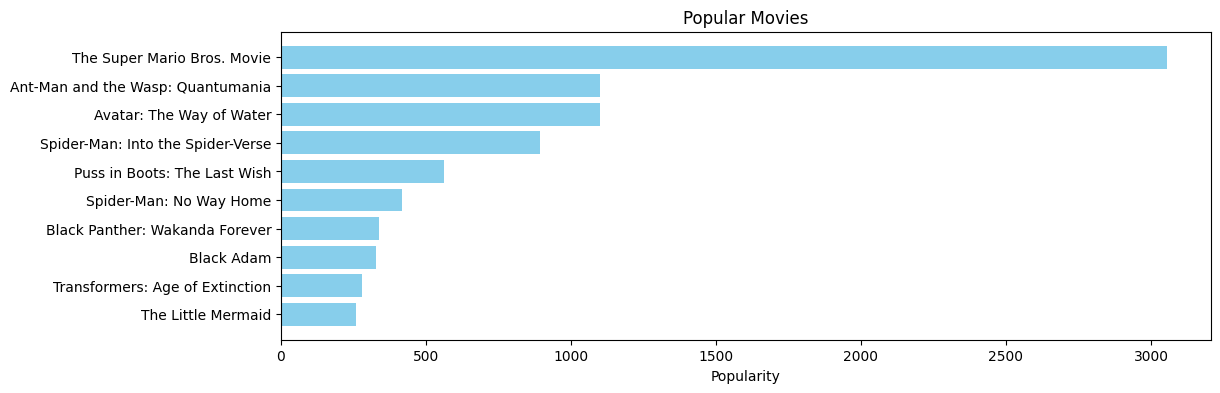

In [34]:
pop = q_movies.sort_values("popularity", ascending=False)
plt.figure(figsize=(12, 4))

plt.barh(
    pop["title"].head(10), pop["popularity"].head(10), align="center", color="skyblue"
)
plt.gca().invert_yaxis()
plt.xlabel("Popularity")
plt.title("Popular Movies")

In [35]:
mean_date = q_movies["release_date"].mean()
min_date = q_movies["release_date"].min()
max_date = q_movies["release_date"].max()
print(f"min = {min_date}, mean = {mean_date}, max = {max_date}")

min = 1936-02-05 00:00:00, mean = 2007-03-09 06:09:25.748824832, max = 2023-04-05 00:00:00


Skoro mamy już wszystko co potrzeba, możemy zapisać nasze zakwalifikowane filmy do pliku q_movies.csv i przejść do analizy danych.

In [36]:
q_movies.to_csv("q_movies.csv", index=False)